In [1]:
#import packages that are required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

In [2]:
vib = pd.read_csv("Vibration-data-set.csv")

In [3]:
my_pal2 = {"Pit 1": "g", "Pit 2": "b", "Pit 3":"m", "seam x 8":"y"}

<p style="font-family: Arial; font-size:1.4em;color:green;"> Exploratory Data Analysis  </p>

In [4]:
print('vib is a %s' % type(vib))
print('Basic Statistics about Vib Dataset%s' % ('_'*30))
print(vib.describe())
print('')
print('Sample of vib%s' % ('_'*65))
print(vib.head())

vib is a <class 'pandas.core.frame.DataFrame'>
Basic Statistics about Vib Dataset______________________________
         Distance_m   Max_instantaneous_charge_mass      PPV_mm_s
count  6.850000e+02                       685.000000   684.000000
mean   8.240483e+03                      4671.252555    25.128655
std    6.184667e+04                      4227.087495    62.293247
min    1.468000e+02                       307.000000     2.000000
25%    2.456000e+03                      1641.000000     4.550000
50%    4.114600e+03                      3390.000000    10.100000
75%    7.763400e+03                      6465.000000    23.450000
max    1.149172e+06                     27584.000000  1000.000000

Sample of vib_________________________________________________________________
  Station name (location fixed) Detonation (district of origin)   Distance_m  \
0                     Monitor 1                           Pit 1       8266.5   
1                     Monitor 2                       

In [5]:
vib.shape

(685, 5)

In [6]:
vib.columns

Index(['Station name (location fixed)', 'Detonation (district of origin)',
       ' Distance_m', ' Max_instantaneous_charge_mass ', ' PPV_mm_s'],
      dtype='object')

Some of the column names have spaces before and after the names. Also need to rename station name and detonation to be less complicated and easier to look up against

In [7]:
#Change column names 
vib=vib.rename(columns= {'Station name (location fixed)' : 'Station_Name' , 'Detonation (district of origin)' : 'Detonation_Origin' , ' Distance_m' : 'Distance_m', ' Max_instantaneous_charge_mass ' : 'MaxICM' , ' PPV_mm_s' : 'PPV_mm_s'})

In [8]:
vib.head(1)

,Station_Name,Detonation_Origin,Distance_m,MaxICM,PPV_mm_s
0,Monitor 1,Pit 1,8266.5,5186,2.8


In [9]:
#The business has provided a calculation that needs to be added into the data frame
vib['DSM'] = vib['Distance_m'] / (vib['MaxICM'] ** 0.5)

In [10]:
#check Dtypes
vib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Station_Name       685 non-null    object 
 1   Detonation_Origin  684 non-null    object 
 2   Distance_m         685 non-null    float64
 3   MaxICM             685 non-null    int64  
 4   PPV_mm_s           684 non-null    float64
 5   DSM                685 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 32.2+ KB


The Dtypes are all ok as they are

In [11]:
#check for any null values
vib.isnull().sum()

Station_Name         0
Detonation_Origin    1
Distance_m           0
MaxICM               0
PPV_mm_s             1
DSM                  0
dtype: int64

As there are only a couple of null values, these can be removed

In [12]:
vib = vib.dropna(how='any',axis=0) 

In [13]:
x = vib['PPV_mm_s']
y = vib['DSM']

Text(0.5, 1.0, 'Full Vibration Dataset (Original)')

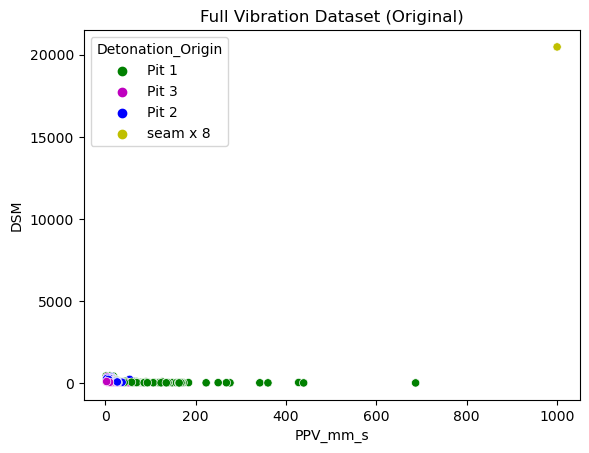

In [14]:
#scatter plot of the original data by Pit #
sns.scatterplot(data=vib, x=x , y=y , hue='Detonation_Origin', palette=my_pal2)
plt.title("Full Vibration Dataset (Original)")

In [15]:
#check there are now no null values
vib.isnull().sum()

Station_Name         0
Detonation_Origin    0
Distance_m           0
MaxICM               0
PPV_mm_s             0
DSM                  0
dtype: int64

In [16]:
vib['Station_Name'].value_counts()

Monitor 1    301
Monitor 2    300
Monitor 3     82
Name: Station_Name, dtype: int64

Drop Station_Name column as this is not relevant to this exercise

In [17]:
#drop station name column as it's not relevant for this analysis and overcomplicates the model
vib.drop(['Station_Name'], axis=1, inplace=True)

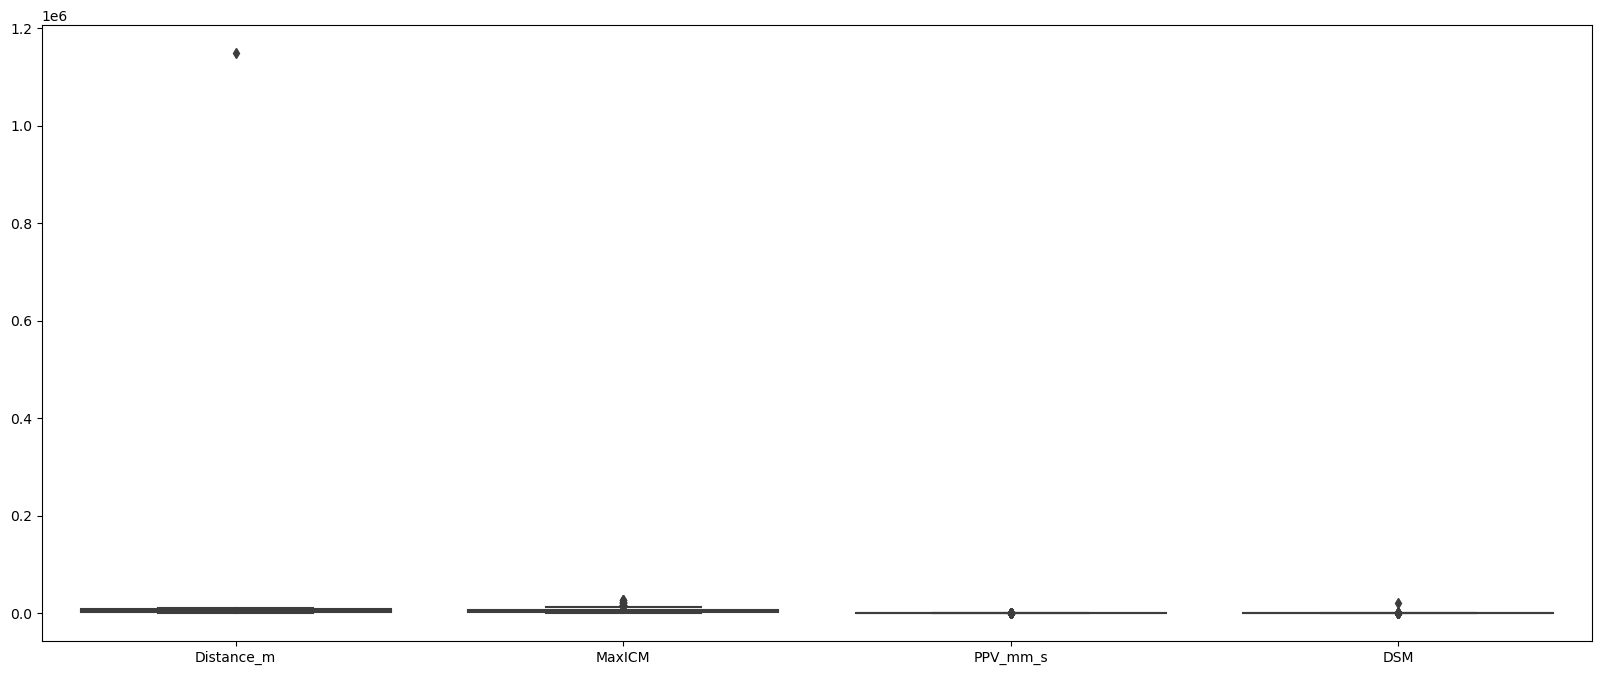

In [18]:
#do a boxplot to show outliers
plt.figure(figsize = (20, 8))
sns.boxplot(data = vib, width = 0.8)
plt.show()

In [19]:
vib['Detonation_Origin'].value_counts()

Pit 1       336
Pit 2       210
Pit 3       136
seam x 8      1
Name: Detonation_Origin, dtype: int64

There are 3 stations, station 1 and 2 have around 300 and station 3 has a smaller amount of data 

<p style="font-family: Arial; font-size:1.4em;color:green;"> Remove Outlier Rows per Consultation  </p>

Should you remove outliers from regression?
Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. 

Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

After consultation with the business, the below "problematic outliers" were removed

Should you remove outliers before or after log transformation?
Removal of outliers creates a normal distribution in some of my variables, and makes transformations for the other variables more effective. Therefore, it seems that removal of outliers before transformation is the better option.

In [20]:
#first investigate the max_instantaneous_charge_mass outliers
outliers=vib['MaxICM'].sort_values()
outliers.tail(12)

621    16561
676    17623
677    17623
616    20005
617    20005
615    20005
665    22501
664    22501
663    22501
654    27584
652    27584
656    27584
Name: MaxICM, dtype: int64

In [21]:
#Drop the outlier rows after consultation
vib.drop([656], axis=0, inplace=True)
vib.drop([652], axis=0, inplace=True)
vib.drop([654], axis=0, inplace=True)
vib.drop([663], axis=0, inplace=True)
vib.drop([664], axis=0, inplace=True)
vib.drop([665], axis=0, inplace=True)
vib.drop([615], axis=0, inplace=True)
vib.drop([617], axis=0, inplace=True)
vib.drop([616], axis=0, inplace=True)

In [22]:
#next investigate the Distance_ms outliers
vib['Distance_m'].sort_values()

648        146.8
618        258.2
508        281.8
591        311.4
437        356.2
         ...    
7        10176.4
367      10213.8
317      10273.6
55       10336.4
683    1149171.8
Name: Distance_m, Length: 674, dtype: float64

In [23]:
#remove row 683 as this is the main outlier 
vib.drop([683], axis=0, inplace=True)

In [24]:
#last investigate the PPV_mm_s outliers
vib['PPV_mm_s'].sort_values()

50       2.0
264      2.0
328      2.0
384      2.0
205      2.0
       ...  
467    342.0
591    360.0
424    428.0
618    439.0
648    686.8
Name: PPV_mm_s, Length: 673, dtype: float64

In [25]:
#remove row 648 as this is the main outlier 
vib.drop([648], axis=0, inplace=True)

<p style="font-family: Arial; font-size:1.4em;color:green;"> Plotting the full dataset  </p>

Text(0.5, 1.0, 'Full Vibration Dataset (Outliers Removed)')

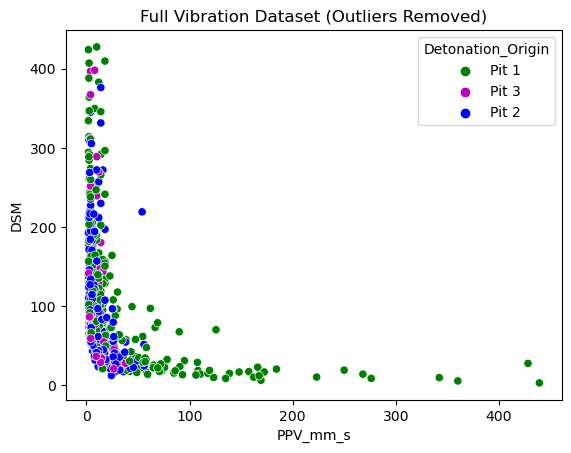

In [26]:
#scatter plot of the data by Pit #
sns.scatterplot(data=vib, x=x , y=y , hue='Detonation_Origin', palette=my_pal2)
plt.title("Full Vibration Dataset (Outliers Removed)")

In statistics, log base 10 (log10) can be used to transform data for the following reasons: To make positively skewed data more "normal" To account for curvature in a linear model. To stabilize variation within groups

In [27]:
#apply log10 formula
vib['DSMT'] = np.log10(vib['DSM'])

In [28]:
vib['PPVT'] = np.log10(vib['PPV_mm_s'])

MICM = Max Instantaneous Charge Mass

DSM = Distance mulitplied by square root of mass

DSMT = log 10 of DSM

PPVT = log 10 of PPV_mm_s



In [29]:
x = vib['PPVT']
y = vib['DSMT']

Text(0.5, 1.0, 'Full Vibration Dataset (log10)')

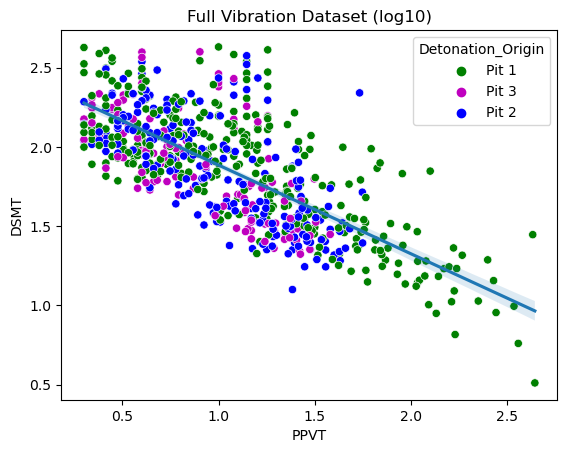

In [30]:
#scatter plot of the data by Pit #
ax=sns.scatterplot(data=vib, x=x , y=y , hue='Detonation_Origin', palette=my_pal2)
sns.regplot(data=vib, x=x, y=y, scatter=False, ax=ax)
plt.title("Full Vibration Dataset (log10)")

Text(0.5, 1.0, 'Heatmap of the Correlation of all Features of the Vibration dataset')

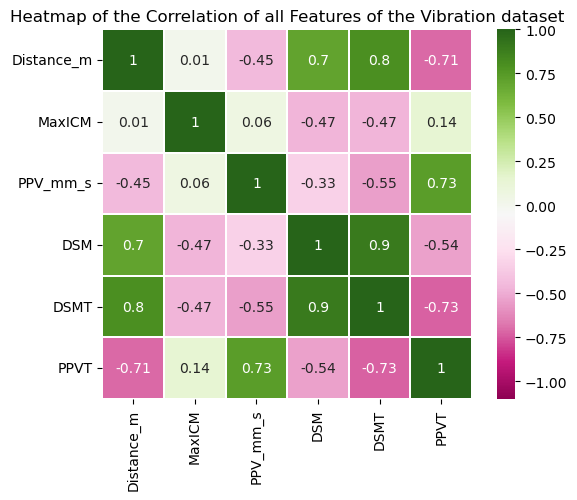

In [31]:
sns.heatmap(vib.corr().round(2), square=True, linewidths=0.1, cmap="PiYG", vmin=1, vmax=-1, annot=True)
plt.title("Heatmap of the Correlation of all Features of the Vibration dataset")

Distance_m and PPVT & DSMT are very highly correlated - remove Distance_m and redo the heat map

In [32]:
vibclean=vib.drop("Distance_m", axis='columns')

Text(0.5, 1.0, 'Heatmap of the Correlation of all Features of the Vibration dataset')

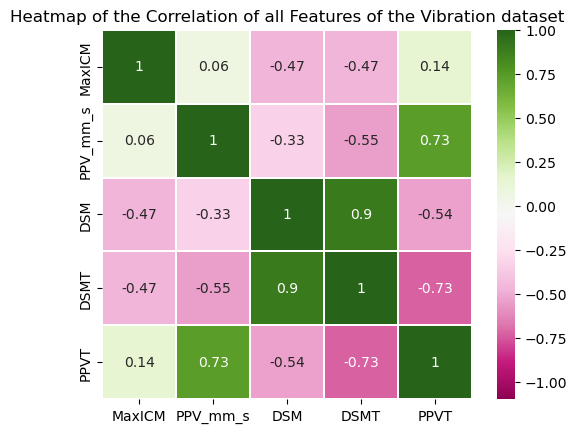

In [33]:
sns.heatmap(vibclean.corr().round(2), square=True, linewidths=0.1, cmap="PiYG", vmin=1, vmax=-1, annot=True)
plt.title("Heatmap of the Correlation of all Features of the Vibration dataset")

In [34]:
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'PPVT ~ DSMT', data = vibclean).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PPVT   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     775.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          5.23e-114
Time:                        14:38:18   Log-Likelihood:                -187.09
No. Observations:                 672   AIC:                             378.2
Df Residuals:                     670   BIC:                             387.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8262      0.065     43.388      0.000       2.698       2.954
DSMT          -0.9577      0.034    -27.854      0.000      -1.025      -0.890
==============================================================================
Omnibus:                       32.409   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.916
Skew:                           0.561   Prob(JB):                     1.59e-08
Kurtosis:                       3.158   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<AxesSubplot:title={'center':'MaxICM'}>,
        <AxesSubplot:title={'center':'PPV_mm_s'}>],
       [<AxesSubplot:title={'center':'DSM'}>,
        <AxesSubplot:title={'center':'DSMT'}>],
       [<AxesSubplot:title={'center':'PPVT'}>, <AxesSubplot:>]],
      dtype=object)

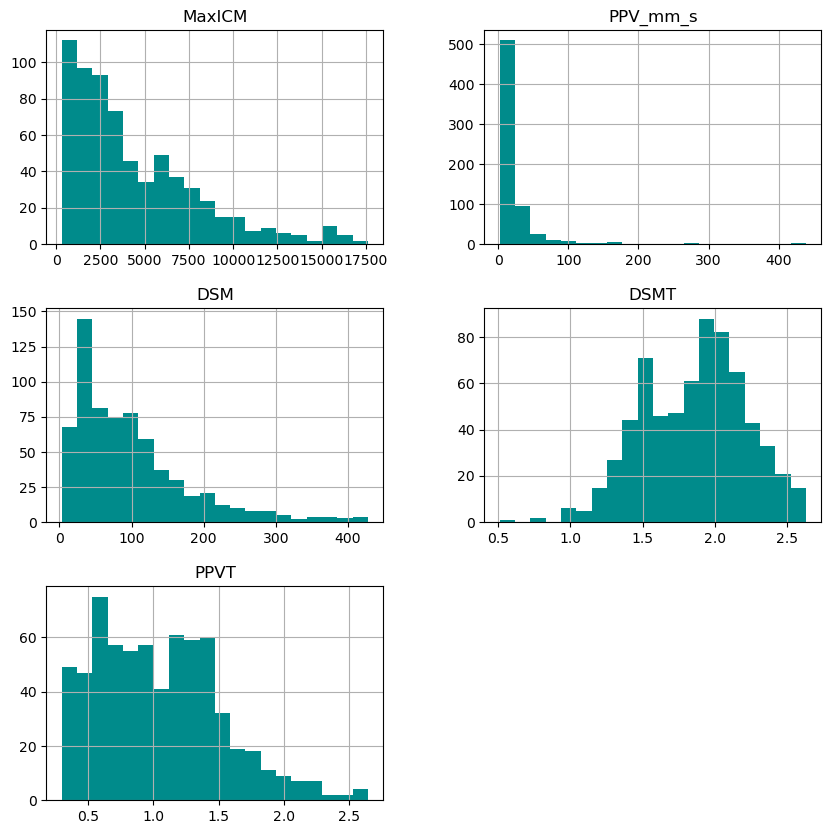

In [35]:
#View each feature as a histogram 
vibclean.hist(bins=20, figsize=(10,10), color="darkcyan")

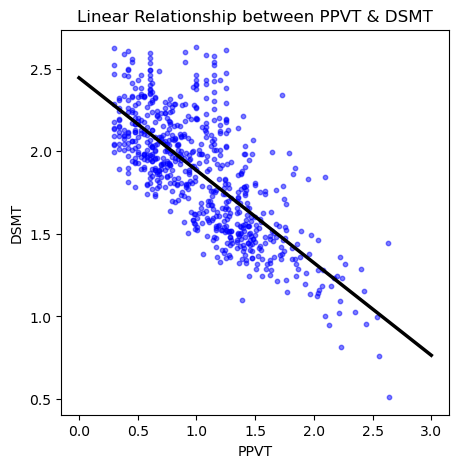

In [36]:
#show the regression line 


x = vibclean['PPVT']
y = vibclean['DSMT']

# Initialize layout
fig, ax = plt.subplots(figsize = (5, 5))

# Add scatterplot
ax.scatter(x, y, s=10, alpha=0.5, edgecolors="b", color="b")
plt.title("Linear Relationship between PPVT & DSMT")
plt.xlabel("PPVT")
plt.ylabel("DSMT")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 3, num=1000)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

In [37]:
vibclean['Detonation_Origin'].value_counts()

Pit 1    332
Pit 2    210
Pit 3    130
Name: Detonation_Origin, dtype: int64

<p style="font-family: Arial; font-size:1.4em;color:green;"> FORWARD FEATURE SELECTION </p>

It's important to use the right feautres in the model

In [38]:
## Flag intermediate output
show_steps = True   # for testing/debugging
# show_steps = False  # without showing steps

In [39]:
#Creating features and a label variable
X = vibclean.drop(columns = ['PPV_mm_s','Detonation_Origin','DSMT'], axis = 1)
y = vibclean['DSMT']

In [40]:
#split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [41]:
X_train.shape[0]

470

In [42]:
## Use Forward Feature Selection to pick a good model
from sklearn.linear_model import LinearRegression
# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = MaxICM, DSM, PPVT
(Step) Trying MaxICM...
(Step) - Features = MaxICM
(Step) - Adjusted R^2: This = 0.194; Best = 0.000
(Step) - New Best!   : Feature = MaxICM; R^2 = 0.196; Adjusted R^2 = 0.194
(Step) Trying DSM...
(Step) - Features = DSM
(Step) - Adjusted R^2: This = 0.798; Best = 0.194
(Step) - New Best!   : Feature = DSM; R^2 = 0.798; Adjusted R^2 = 0.798
(Step) Trying PPVT...
(Step) - Features = PPVT
(Step) - Adjusted R^2: This = 0.512; Best = 0.798
Added feature DSM  with R^2 = 0.798 and adjusted R^2 = 0.798

(Step) Excluded = MaxICM, PPVT
(Step) Trying MaxICM...
(Step) - Features = DSM, MaxICM
(Step) - Adjusted R^2: This = 0.799; Best = 0.798
(Step) - New Best!   : Feature = MaxICM; R^2 = 0.800; Adjusted R^2 = 0.799
(Step) Trying PPVT...
(Step) - Features = DSM, PPVT
(Step) - Adjusted R^2: This = 0.883; Best = 0.799
(Step) - New Best!   : Feature = PPVT; R^2 = 0.883; Adjusted R^2 = 0.883
Added feature PPVT with R^2 = 0.883 and adjusted R^2 = 0.883

(Step) Exclu

The best features to use in this case is DSM, PPVT & MaxICM together as the adjsuted R^2 is 0.892 which is the highest of all above

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Linear Regression  </p>

In [43]:
#Creating features and a label variable
X = vibclean.drop(columns = ['PPV_mm_s','Detonation_Origin','DSMT'], axis = 1)
y = vibclean['DSMT']

In [44]:
# About training
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])


# About test
print('')
print('')
print('')
print('X_train is a %s' % type(X_test))
print('X_train has %d rows', X_test.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_test[:10])

print('')
print('y_train is a %s' % type(y_test))
print('y_train has %d rows', y_test.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_test[:10])

X_train is a <class 'pandas.core.frame.DataFrame'>
X_train has %d rows 470

Sample of X_train__________________________________________________
     MaxICM         DSM      PPVT
427    3002   30.184059  1.579784
132    1174  206.305899  0.778151
173    2257  212.164740  0.643453
178    3011  155.596840  0.342423
623   16561   62.813959  0.832509
405     667  210.444040  0.342423
172    2257   26.921842  1.394452
97     1343  221.420795  0.531479
614    1996  194.542488  0.903090
659     720  305.592230  0.681241

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (470,)

Sample of y_train__________________________________________________
427    1.479778
132    2.314512
173    2.326673
178    2.192001
623    1.798056
405    2.323137
172    1.430105
97     2.345218
614    2.289014
659    2.485142
Name: DSMT, dtype: float64



X_train is a <class 'pandas.core.frame.DataFrame'>
X_train has %d rows (202, 3)

Sample of X_train________________________________________________

In [45]:
#split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#fit the training data to the model

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

#find the score
linreg.score(X_test, y_test)

[-1.04688725e-05  2.96594701e-03 -2.73226767e-01] 1.9023155552059714


0.9163427458196197

In [46]:
model.coef_

array([ 2.96594701e-03, -2.73226767e-01, -1.04688725e-05])

In [47]:
linreg.coef_

array([-1.04688725e-05,  2.96594701e-03, -2.73226767e-01])

In [48]:
def view_coeff(X, linreg):
    model_coefs = pd.DataFrame({'variable': X.columns,
                                'coef': linreg.coef_,
                                'abs_coef': np.abs(linreg.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

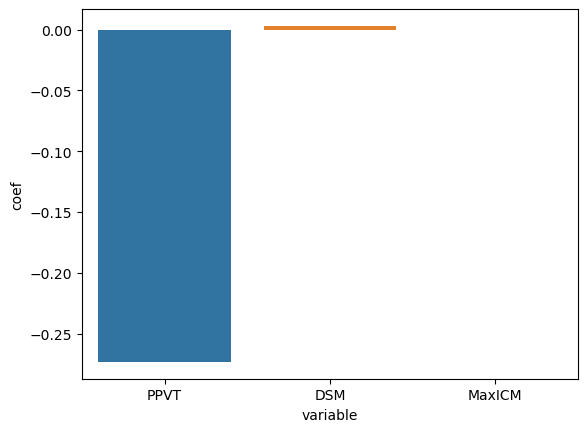

In [49]:
view_coeff(X, linreg)

In [50]:
linreg.coef_

array([-1.04688725e-05,  2.96594701e-03, -2.73226767e-01])

In [51]:
model.coef_

array([ 2.96594701e-03, -2.73226767e-01, -1.04688725e-05])

In [52]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error as mae
MSE =  metrics.mean_squared_error(linreg.coef_, model.coef_)
RMSE = math.sqrt(MSE)
MAE = mae(linreg.coef_, model.coef_)
print('MSE:', metrics.mean_squared_error(linreg.coef_, model.coef_))
print('RMSE:', math.sqrt(MSE))
print('MAE:', mae(linreg.coef_, model.coef_))

MSE: 0.05031280656320595
RMSE: 0.22430516392452035
MAE: 0.18412847588820935


<p style="font-family: Arial; font-size:1.4em;color:blue;"> Lasso Regression  </p>

In [53]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# create a model object to hold the modelling parameters
lassomodel = linear_model.Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)

for a in lasso_alphas:
    lassomodel.set_params(alpha = a)
    lassomodel.fit(X, y)
    coefs.append(lassomodel.coef_)
    errors.append(mean_squared_error(lassomodel.coef_, model.coef_))


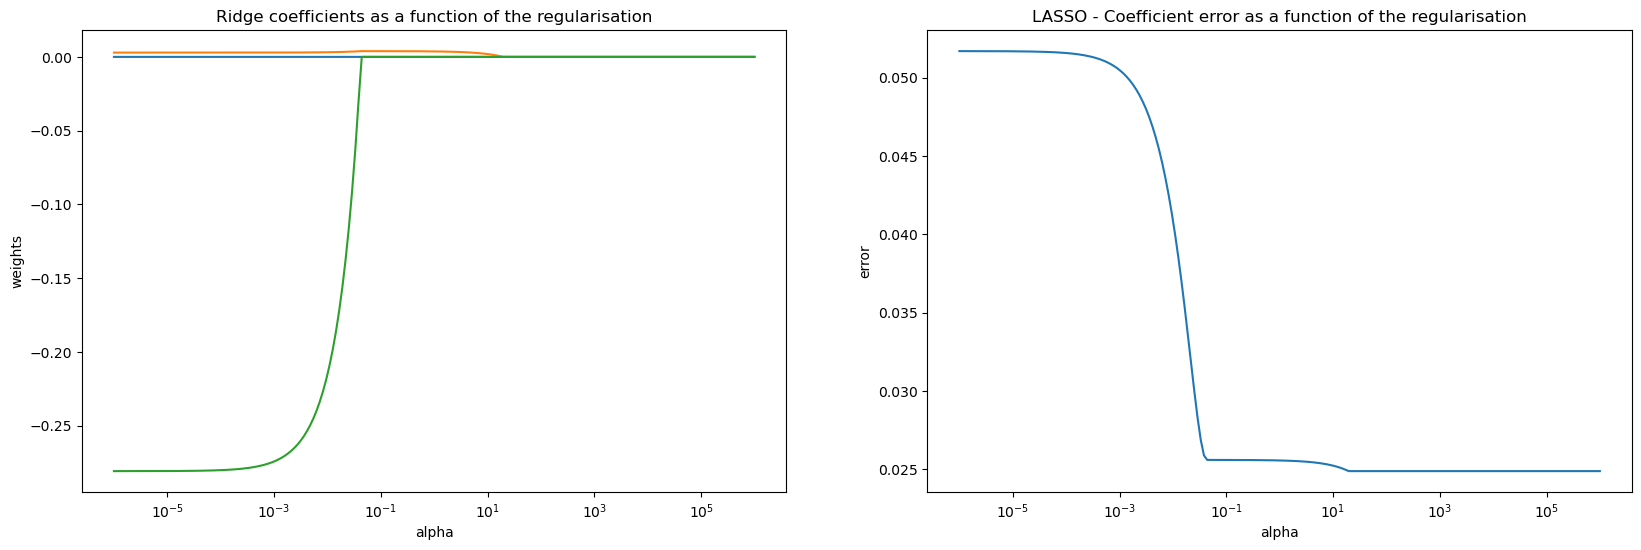

In [54]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(lasso_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('LASSO - Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [55]:
optimal_lasso = linear_model.LassoCV(alphas=lasso_alphas, cv=10)
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 1e-06
Score: 0.9001630156099779


In [56]:
import sklearn.metrics as metrics
MSE =  metrics.mean_squared_error(lassomodel.coef_, model.coef_)
RMSE = math.sqrt(MSE)
MAE = mae(lassomodel.coef_, model.coef_)
print('MSE:', metrics.mean_squared_error(lassomodel.coef_, model.coef_))
print('RMSE:', math.sqrt(MSE))
print('MAE:', mae(lassomodel.coef_, model.coef_))

MSE: 0.024887221019368397
RMSE: 0.1577568414344316
MAE: 0.09206772756828026


<p style="font-family: Arial; font-size:1.4em;color:blue;"> Ridge Regression  </p>

In [57]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# create a model object to hold the modelling parameters
ridgemodel = linear_model.Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

for a in ridge_alphas:
    ridgemodel.set_params(alpha = a)
    ridgemodel.fit(X, y)
    coefs.append(ridgemodel.coef_)
    errors.append(mean_squared_error(ridgemodel.coef_, model.coef_))




In [58]:
model.coef_

array([ 2.96594701e-03, -2.73226767e-01, -1.04688725e-05])

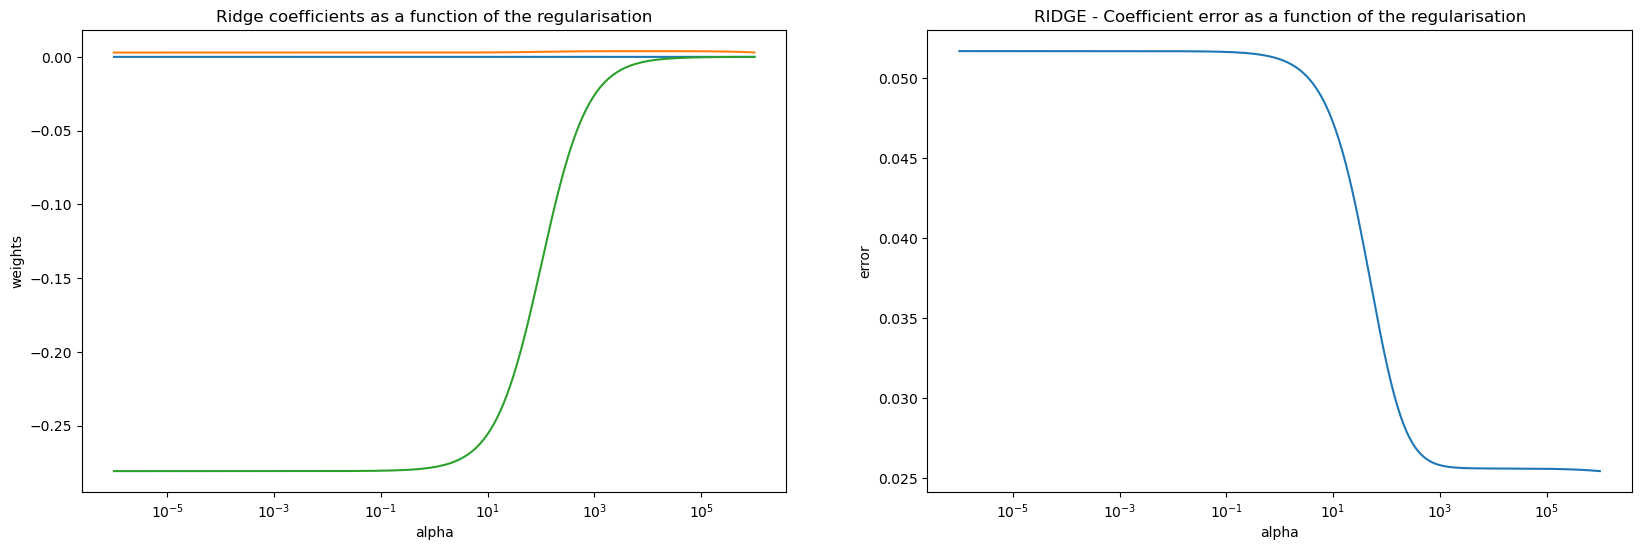

In [59]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('RIDGE - Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

In [60]:
optimal_ridge = linear_model.RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 1e-06
Score: 0.9001630156605562


In [61]:
import sklearn.metrics as metrics
MSE =  metrics.mean_squared_error(ridgemodel.coef_, model.coef_)
RMSE = math.sqrt(MSE)
MAE = mae(ridgemodel.coef_, model.coef_)
print('MSE:', metrics.mean_squared_error(ridgemodel.coef_, model.coef_))
print('RMSE:', math.sqrt(MSE))
print('MAE:', mae(ridgemodel.coef_, model.coef_))

MSE: 0.025438407962183898
RMSE: 0.15949422548225342
MAE: 0.09308194917109258


<p style="font-family: Arial; font-size:1.4em;color:green;"> K-Fold Cross Validation </p>

In [62]:
from sklearn.model_selection import KFold
KFold

sklearn.model_selection._split.KFold

In [63]:
# split data into 5 folds
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 537, Test set:135
Fold:2, Train set: 537, Test set:135
Fold:3, Train set: 538, Test set:134
Fold:4, Train set: 538, Test set:134
Fold:5, Train set: 538, Test set:134


In [64]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [65]:
#cf = kf
from sklearn.model_selection import cross_val_score
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.01405286 -0.0132509  -0.01496241 -0.01298047 -0.01047441]
rmse= 0.11


In [66]:
# split data into 5 folds
kf =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 604, Test set:68
Fold:2, Train set: 604, Test set:68
Fold:3, Train set: 605, Test set:67
Fold:4, Train set: 605, Test set:67
Fold:5, Train set: 605, Test set:67
Fold:6, Train set: 605, Test set:67
Fold:7, Train set: 605, Test set:67
Fold:8, Train set: 605, Test set:67
Fold:9, Train set: 605, Test set:67
Fold:10, Train set: 605, Test set:67


In [67]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [68]:
#cf = kf
from sklearn.model_selection import cross_val_score
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.01500685 -0.01264444 -0.01149777 -0.01507698 -0.01161383 -0.01853654
 -0.01269072 -0.01316291 -0.01056515 -0.01025297]
rmse= 0.11
